In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/MyDrive/fruit_recoginition/"

In [ ]:
pwd

'/content'

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image

In [ ]:
for dirname,_, filenames in os.walk(dir_path):
  for filename in filenames:
    print(os.path.join(dirname,filename))


gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_29.jpg
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_34.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_65.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_62.jpg
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_5.jpg
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_37.jpg
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_21.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_16.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_48.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_33.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_53.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_2.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/banana_26.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_45.xml
gdrive/MyDrive/fruit_recoginition/train_zip/train/apple_69.jpg
gdrive/MyDrive/fruit_recoginition/train_zip/train

capturing Labels

In [ ]:
images=[]
label=[]
train_dir = "gdrive/MyDrive/fruit_recoginition/train_zip/train"
for filename in os.listdir("gdrive/MyDrive/fruit_recoginition/train_zip/train"):
  if filename.split('.')[1] == 'jpg':
    img  =  cv2.imread(os.path.join(train_dir,filename))
    arr = Image.fromarray(img,'RGB')
    img_arr = arr.resize((100,100))
    label.append(filename.split('_')[0])
    images.append(np.array(img_arr))

In [ ]:
#unique Labels
np.unique(label)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = pd.DataFrame(label)
labels = le.fit_transform(labels[0])

In [ ]:
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2])

Visualize

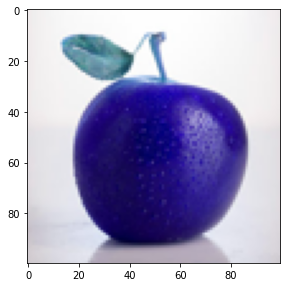

In [ ]:
import matplotlib.pyplot as plt
f=plt.figure(figsize=(10,10))
I1=f.add_subplot(121)
I1.imshow(images[0])

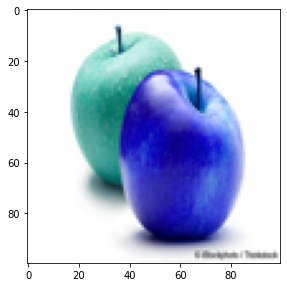

In [ ]:
f=plt.figure(figsize=(10,10))
I1=f.add_subplot(122)
I1.imshow(images[72])

Preprocessing Images

In [ ]:
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

In [ ]:
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

In [ ]:
img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [ ]:
no_classes = len(np.unique(labels))

In [ ]:
len_data=len(Image)

In [ ]:
X_train, X_test = Image[(int)(0.1*len_data):],Image[:(int)(0.1*len_data)]
y_train,y_test = Labels[(int)(0.1*len_data):],Labels[:(int)(0.1*len_data)]

In [ ]:
import tensorflow as tf
from keras.regularizers import l2

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,no_classes)
y_test = tf.keras.utils.to_categorical(y_test,no_classes)

# Model Building

In [ ]:
reg=0.001
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(100,100,3),kernel_regularizer = l2(reg) ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=62, kernel_size=(2,2), activation='relu',kernel_regularizer = l2(reg) ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu',kernel_regularizer = l2(reg) ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(tf.keras.layers.Dropout(0.1))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=32,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 99, 99, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 62)        7998      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 62)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       63744     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 256)     

In [ ]:
model.compile(optimizer= 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size = 128,epochs = 50,verbose = 1,validation_split = 0.33)

Epoch 1/50
2/2 [==============================] - 2s 575ms/step - loss: 0.1140 - accuracy: 1.0000 - val_loss: 1.7932 - val_accuracy: 0.8472
Epoch 2/50
2/2 [==============================] - 2s 554ms/step - loss: 0.1137 - accuracy: 1.0000 - val_loss: 1.7558 - val_accuracy: 0.8472
Epoch 3/50
2/2 [==============================] - 2s 530ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 1.7290 - val_accuracy: 0.8472
Epoch 4/50
2/2 [==============================] - 2s 527ms/step - loss: 0.1132 - accuracy: 1.0000 - val_loss: 1.7345 - val_accuracy: 0.8472
Epoch 5/50
2/2 [==============================] - 2s 539ms/step - loss: 0.1129 - accuracy: 1.0000 - val_loss: 1.7400 - val_accuracy: 0.8472
Epoch 6/50
2/2 [==============================] - 2s 542ms/step - loss: 0.1126 - accuracy: 1.0000 - val_loss: 1.7450 - val_accuracy: 0.8472
Epoch 7/50
2/2 [==============================] - 2s 536ms/step - loss: 0.1123 - accuracy: 1.0000 - val_loss: 1.7497 - val_accuracy: 0.8472
Epoch 8/50
2/2 [====

Testing

banana


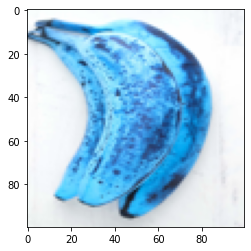

In [ ]:
from PIL import Image
test_path  =  'gdrive/MyDrive/fruit_recoginition/test_zip/test'
t_labels = []
t_images = []
for filename in os.listdir('gdrive/MyDrive/fruit_recoginition/test_zip/test'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((100,100))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

test_images = np.array(t_images)
np.save("test_image",test_images)
test_image = np.load("image.npy",allow_pickle = True)

pred = np.argmax(model.predict(test_image),axis = 1)
prediction  =  le.inverse_transform(pred)

test_image = np.expand_dims(test_image[35],axis = 0)
pred_test = np.argmax(model.predict(test_image),axis = 1)
prediction_test  =  le.inverse_transform(pred_test)

print(prediction_test[0])
plt.imshow(test_images[31])